In [1]:
# Import necessary libraries for data manipulation and visualization
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Reading the dataset

In [2]:
# Read the cancer dataset from 'cancer.csv' using pandas, specifying 'latin1' encoding.
df = pd.read_csv('cancer.csv', encoding = 'latin1')

In [3]:
# Cell 2: Display the first few rows of the loaded dataset for a quick overview.
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
len(df)

3047

In [5]:
# Select numerical columns and remove rows with missing values, updating the DataFrame
df = df.select_dtypes(include = [np.number]).dropna()

In [6]:
# View the number of sample in dataset
num_samples = len(df)
num_samples

591

In [7]:
# View the number of features
num_features = len (df.columns)
num_features

32

In [8]:
#Calculate and display statistics (mean and standard deviation) for numerical features
feature_stats = df.describe().transpose()[['mean','std']]

In [9]:
feature_stats

,mean,std
avgAnnCount,682.316495,1977.289390
avgDeathsPerYear,199.411168,708.330454
TARGET_deathRate,179.090863,27.273580
incidenceRate,452.657990,54.381212
medIncome,47032.851100,11405.103542
popEst2015,114552.570220,504352.705204
povertyPercent,16.723181,6.219356
studyPerCap,122.729567,357.586595
MedianAge,45.985787,47.697553
MedianAgeMale,39.573266,5.118305


In [10]:
# Calculate the correlation matrix for numerical features using Pearson correlation
correlation_matrix = df.corr(method = "pearson")

In [11]:
correlation_matrix

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.963882,-0.128587,0.010871,0.219067,0.957520,-0.105566,0.079980,-0.026047,-0.110806,...,0.133070,0.131033,-0.164938,-0.072116,-0.138574,0.020755,0.480718,0.276332,-0.086528,-0.036560
avgDeathsPerYear,0.963882,1.000000,-0.096510,0.005936,0.189414,0.988023,-0.048667,0.086374,-0.020042,-0.136011,...,0.088625,0.105198,-0.137201,-0.019233,-0.179069,0.069639,0.486688,0.285097,-0.120332,-0.076831
TARGET_deathRate,-0.128587,-0.096510,1.000000,0.376033,-0.377156,-0.109513,0.366102,-0.033589,-0.011419,-0.026774,...,-0.322015,-0.228443,0.346525,0.388474,-0.158205,0.258829,-0.199772,-0.209761,-0.291756,-0.051311
incidenceRate,0.010871,0.005936,0.376033,1.000000,0.064140,-0.018021,-0.021349,0.094944,0.020339,-0.070816,...,0.173349,0.189013,-0.069795,-0.061571,-0.029996,0.102696,0.076300,-0.208808,-0.141188,-0.103238
medIncome,0.219067,0.189414,-0.377156,0.064140,1.000000,0.177701,-0.796091,0.115285,-0.003541,-0.079002,...,0.786730,0.757948,-0.764296,-0.733614,0.190445,-0.270956,0.465658,0.078734,0.468958,-0.079201
popEst2015,0.957520,0.988023,-0.109513,-0.018021,0.177701,1.000000,-0.039724,0.073192,-0.021496,-0.145278,...,0.081420,0.091063,-0.141193,-0.020699,-0.172378,0.055595,0.479433,0.299631,-0.097910,-0.061795
povertyPercent,-0.105566,-0.048667,0.366102,-0.021349,-0.796091,-0.039724,1.000000,-0.093313,-0.016437,-0.233281,...,-0.743404,-0.674968,0.634122,0.790520,-0.529978,0.528894,-0.168474,0.060031,-0.598793,0.024339
studyPerCap,0.079980,0.086374,-0.033589,0.094944,0.115285,0.073192,-0.093313,1.000000,-0.027249,-0.060887,...,0.142935,0.155486,-0.113575,-0.082975,0.021907,-0.017010,0.098969,0.003875,-0.051405,-0.024016
MedianAge,-0.026047,-0.020042,-0.011419,0.020339,-0.003541,-0.021496,-0.016437,-0.027249,1.000000,0.075247,...,-0.008464,-0.012627,0.034639,-0.006858,0.016302,0.018361,-0.054970,-0.017505,-0.005902,0.004128
MedianAgeMale,-0.110806,-0.136011,-0.026774,-0.070816,-0.079002,-0.145278,-0.233281,-0.060887,0.075247,1.000000,...,-0.190114,-0.217323,0.384922,0.006612,0.416602,-0.260831,-0.316228,-0.265851,0.206939,-0.037352


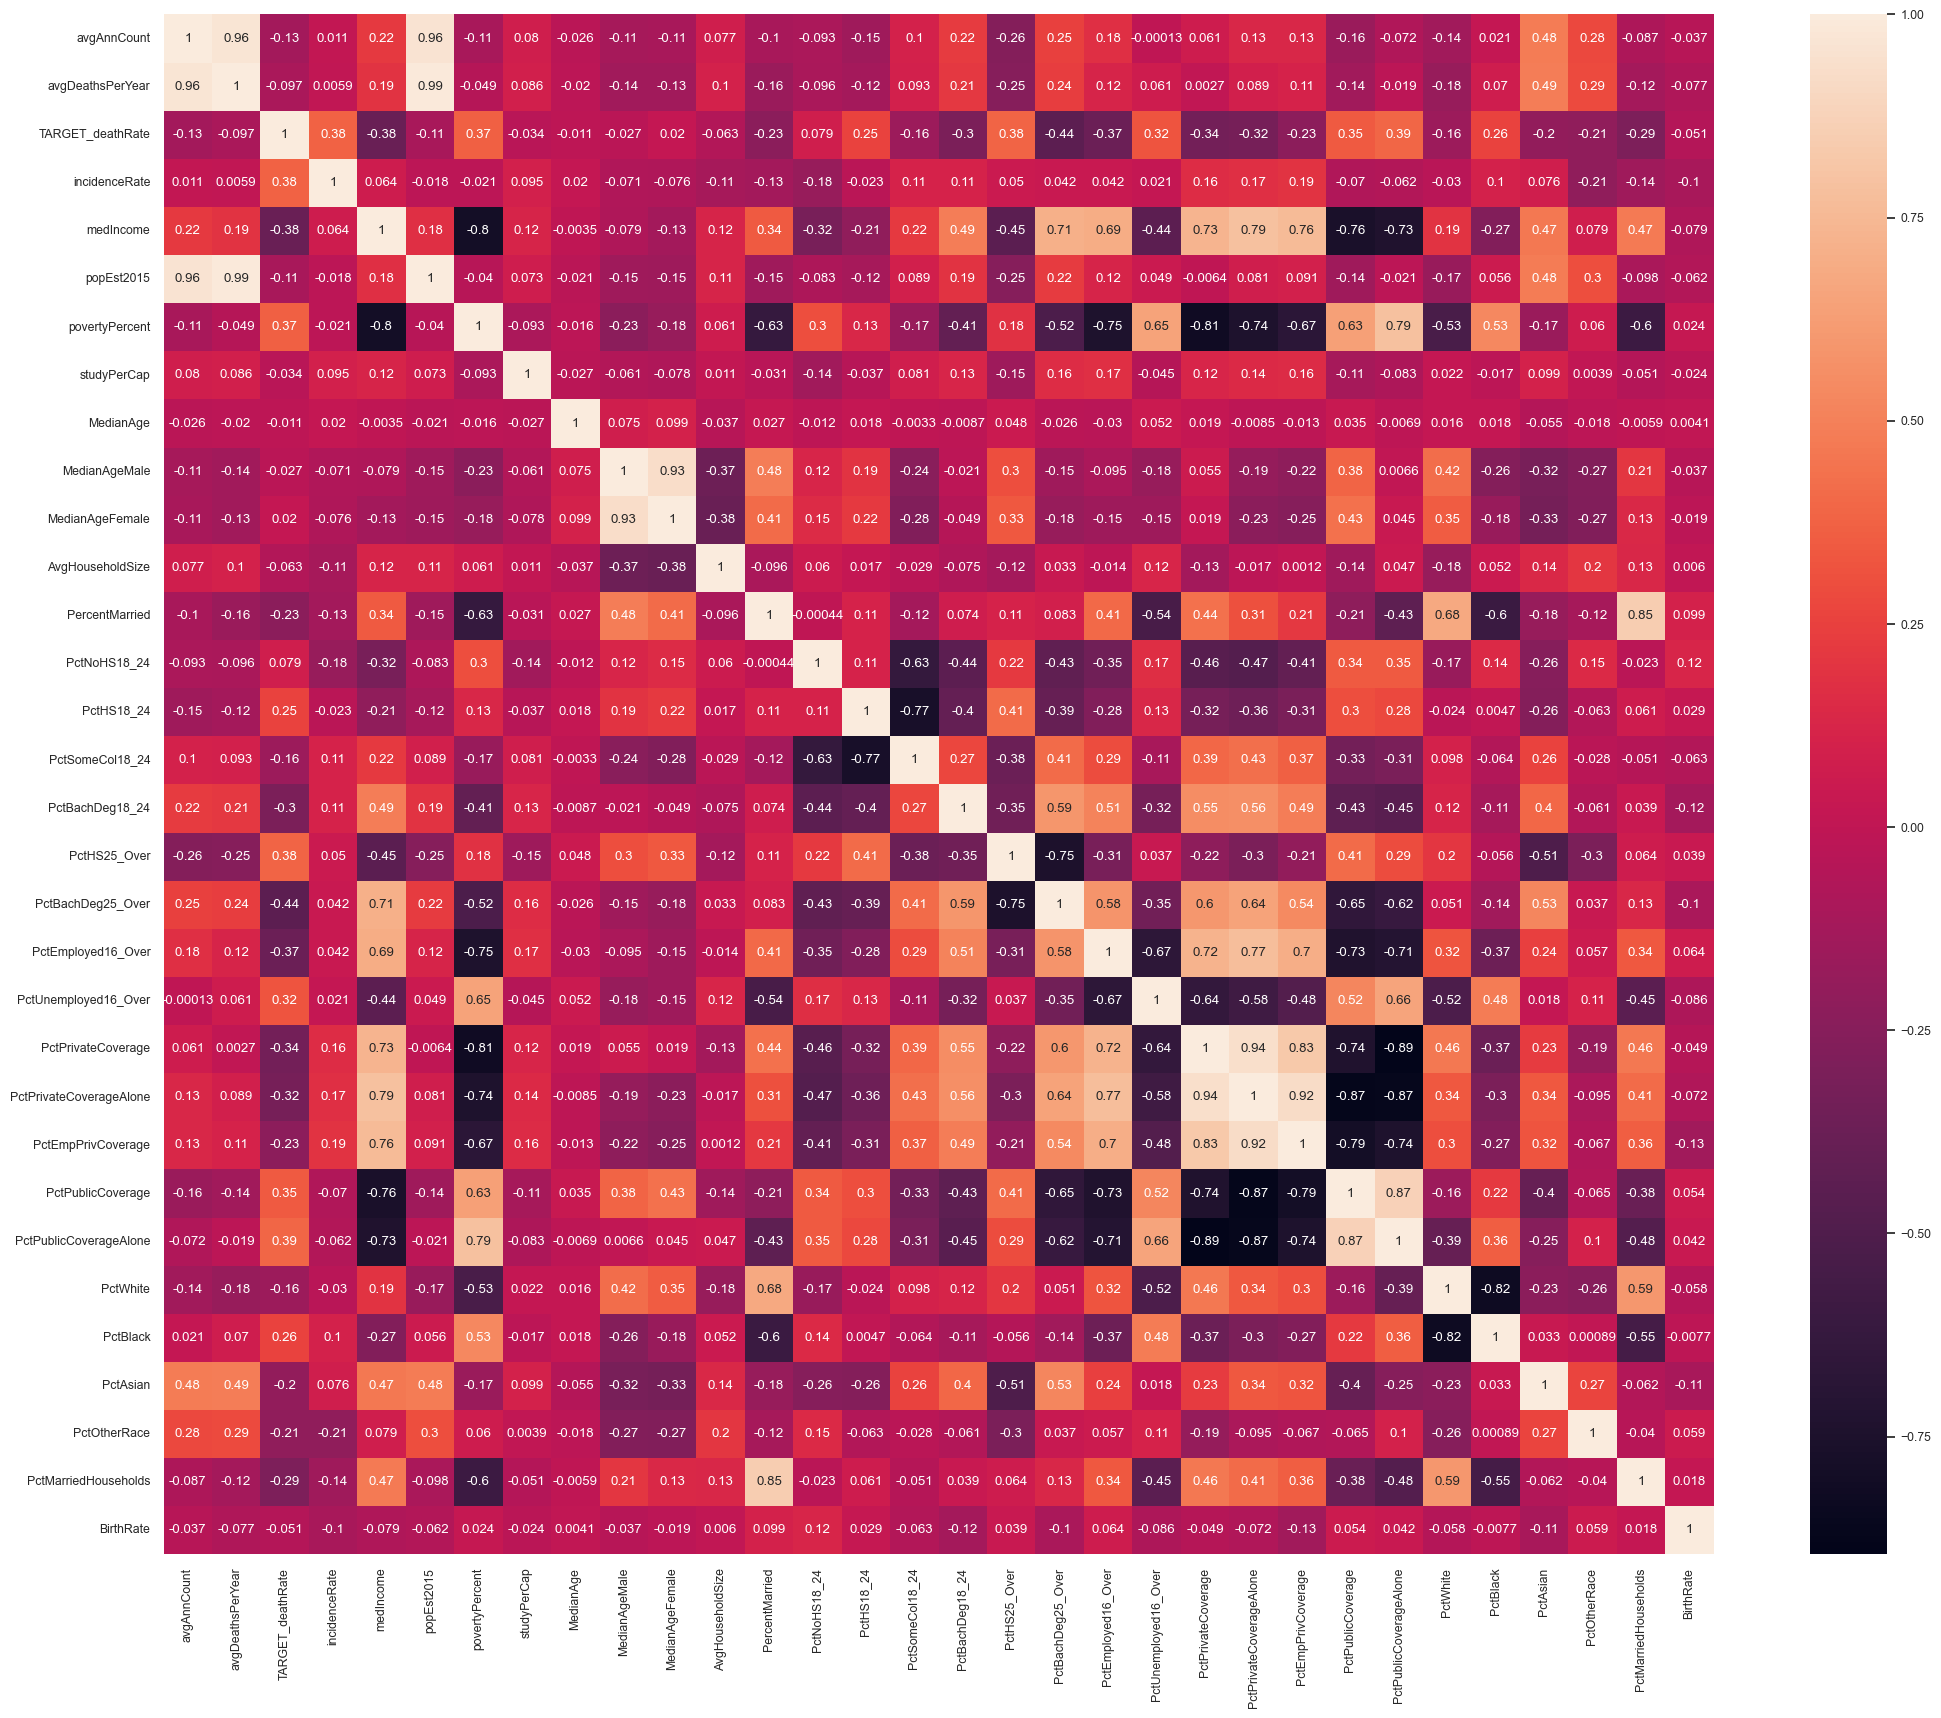

In [12]:
# Set the font scale, create a heatmap of the correlation matrix, and display it
sns.set(font_scale=0.8)
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

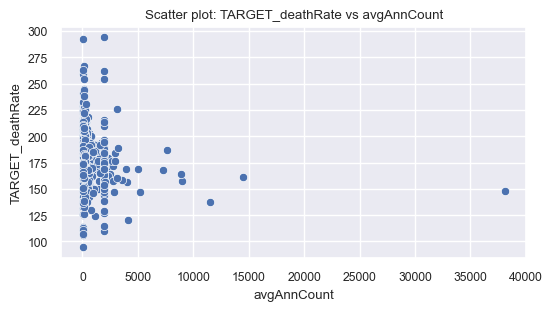

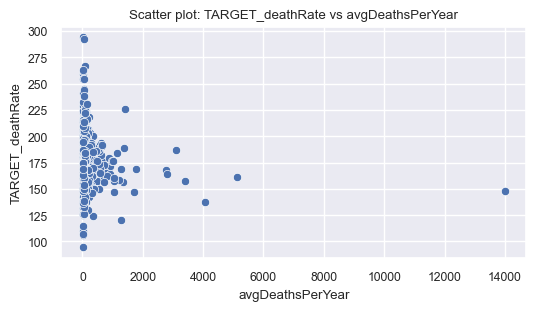

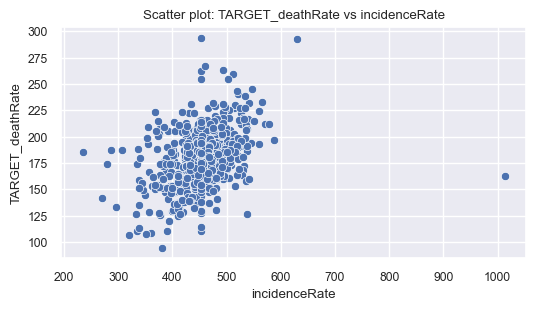

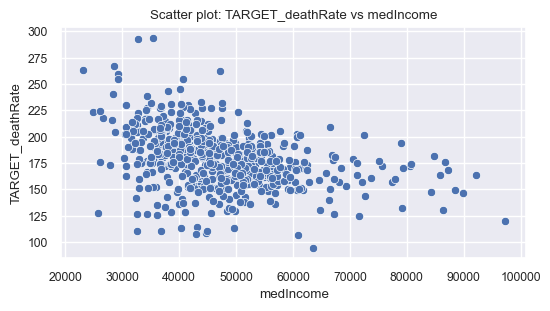

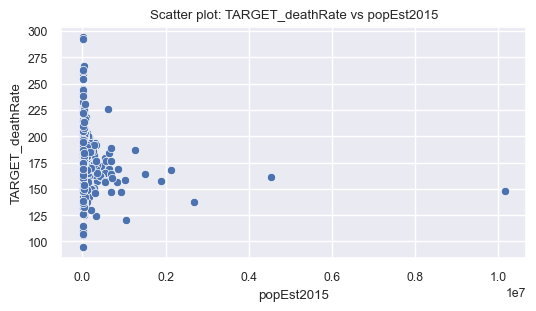

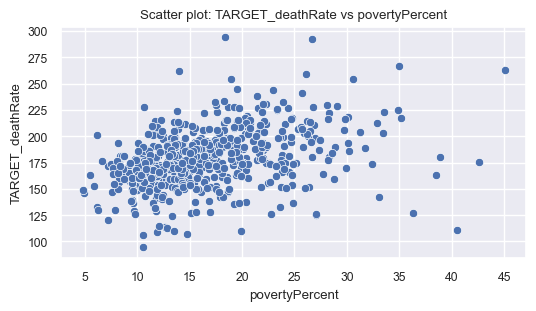

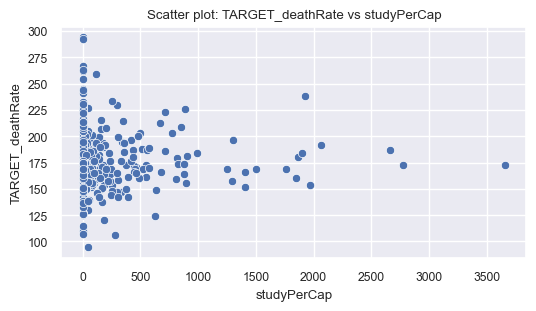

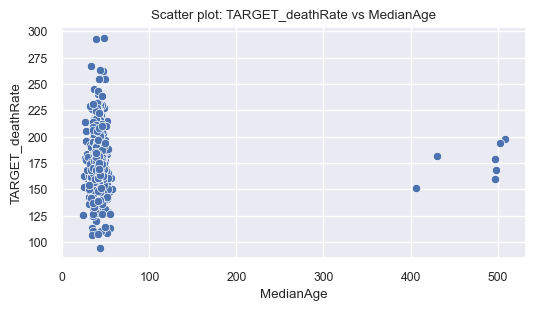

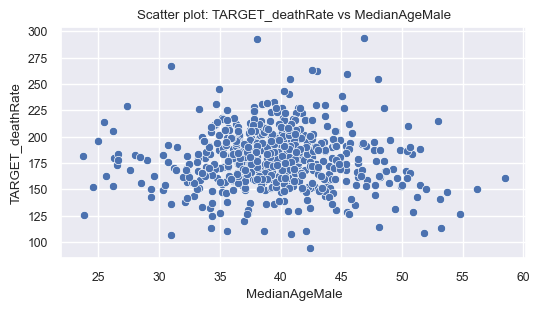

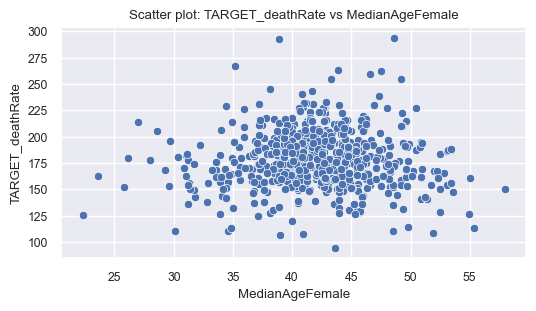

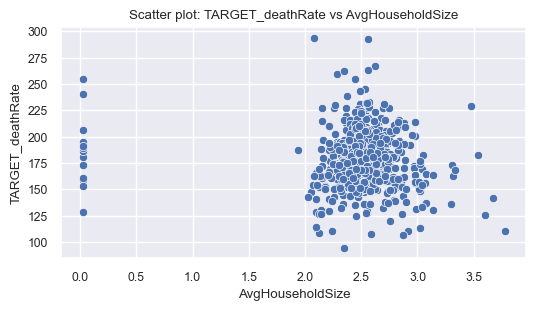

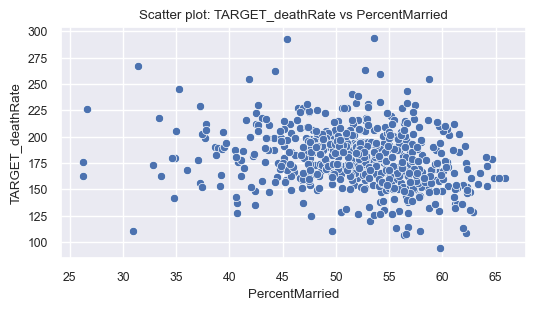

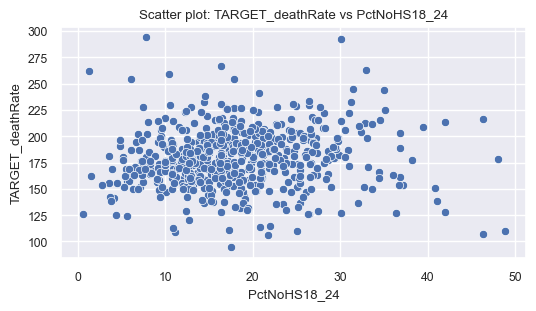

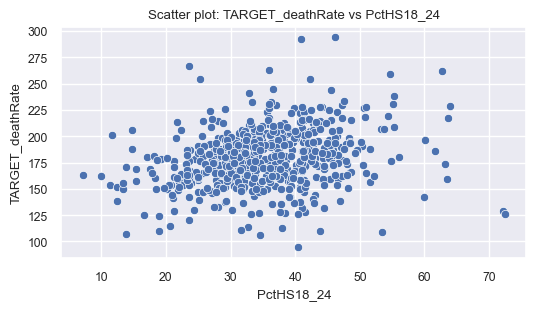

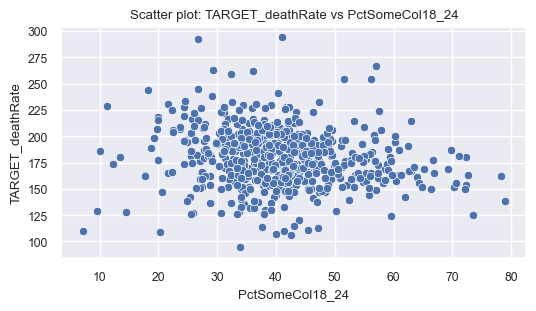

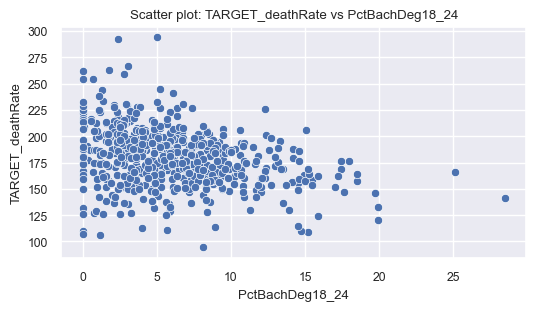

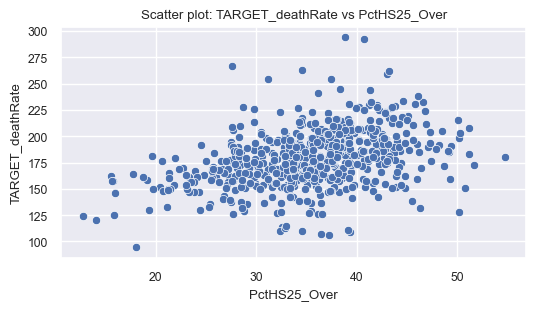

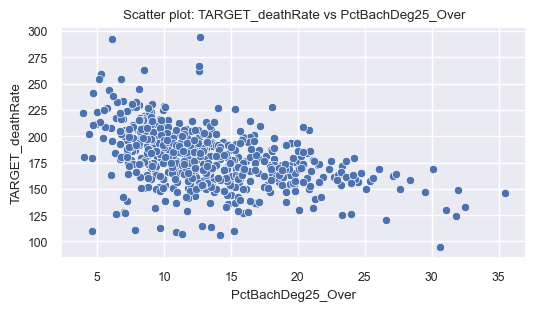

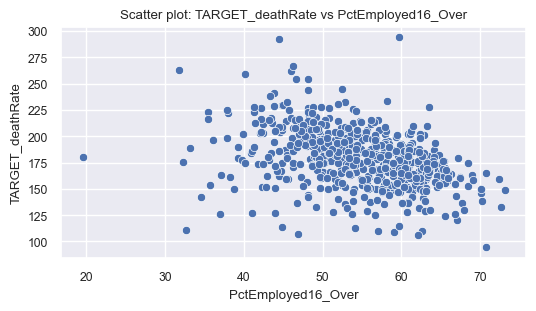

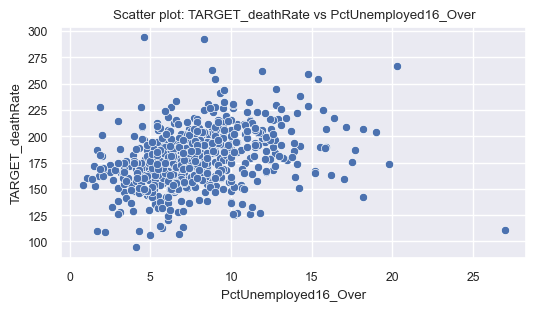

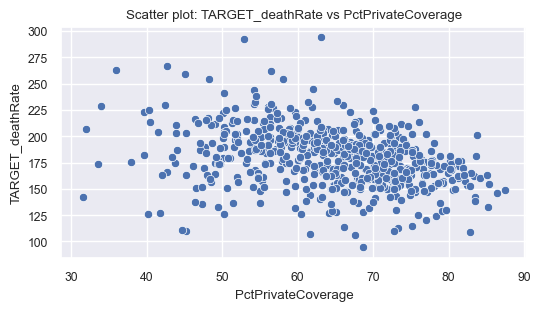

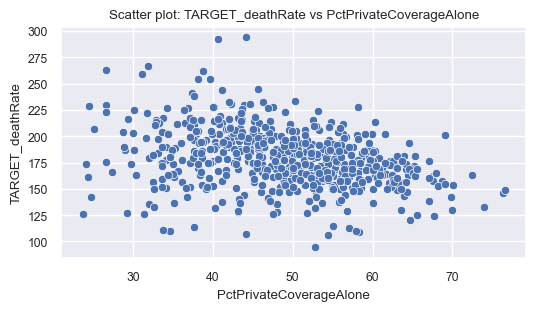

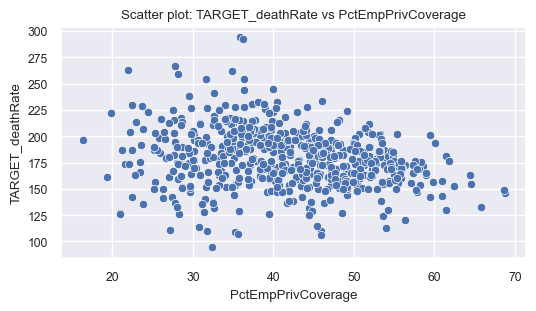

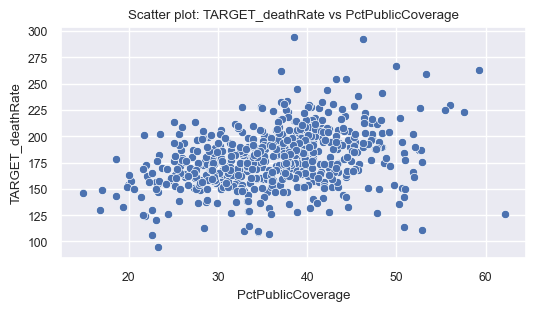

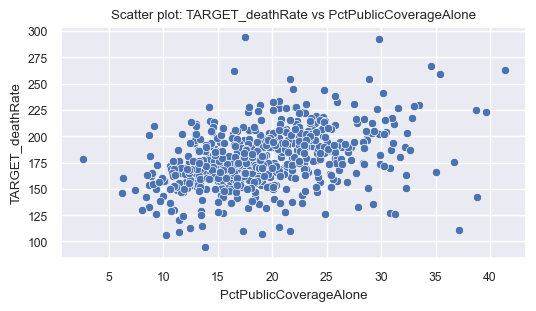

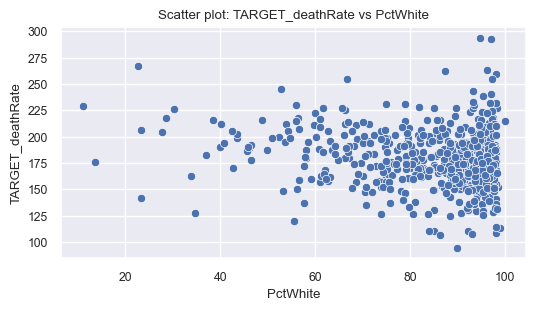

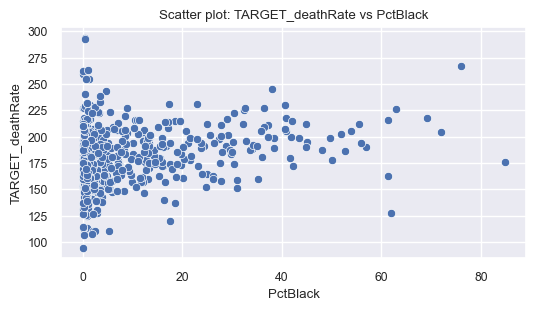

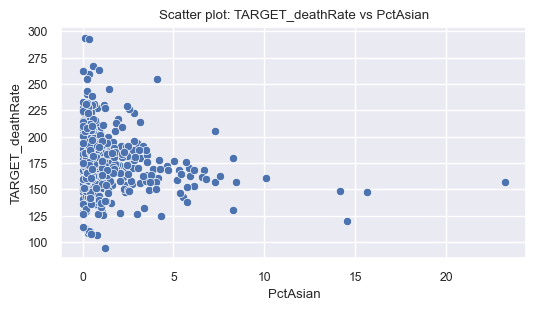

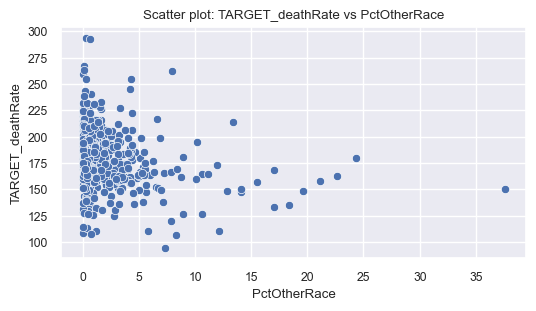

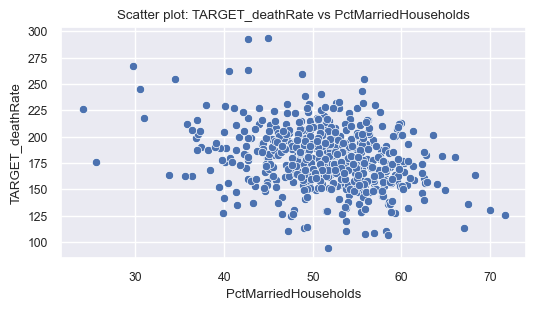

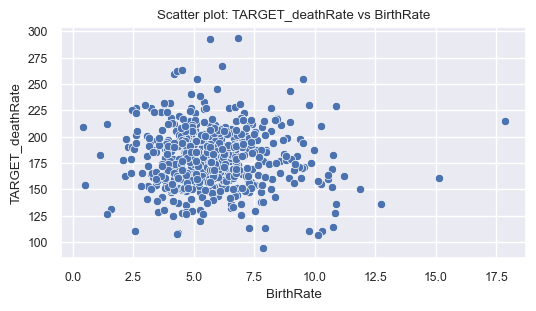

In [13]:
# Visualize scatter plots for each feature against the target variable 'TARGET_deathRate'
features_to_visualize = df.columns[df.columns != 'TARGET_deathRate']
for feature in features_to_visualize:
    plt.figure(figsize=(6,3))
    sns.scatterplot(x=feature, y='TARGET_deathRate', data = df)
    plt.title(f'Scatter plot: TARGET_deathRate vs {feature}' )
    plt.xlabel(feature)
    plt.ylabel('TARGET_deathRate')
    plt.show()

In [14]:
# Split the DataFrame into features (X) and the target variable (y)
X = df.drop('TARGET_deathRate', axis=1)
y = df['TARGET_deathRate']

In [15]:
X

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,173.000000,70,411.600000,48127,43269,18.6,23.111234,33.0,32.2,33.7,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
3,427.000000,202,430.400000,44243,75882,17.1,342.637253,42.8,42.2,43.4,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,350.100000,49955,10321,12.5,0.000000,48.3,47.8,48.9,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
7,146.000000,71,404.000000,40189,20848,17.8,0.000000,51.7,50.8,52.5,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
14,2265.000000,901,440.700000,50083,490945,16.3,462.373586,37.2,35.7,38.7,...,50.6,42.5,36.5,21.4,89.038167,1.827041,2.315986,1.033625,48.188377,5.355836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,1962.667684,7,453.549422,45353,1843,11.4,0.000000,45.7,43.8,49.2,...,52.7,43.9,32.2,9.2,97.960199,0.000000,0.547264,0.995025,57.780612,4.664723
3034,1962.667684,85,453.549422,45180,35788,15.0,1900.078239,38.2,36.5,40.0,...,52.3,46.2,34.4,17.4,87.718617,3.168048,1.610355,1.893068,50.730567,7.404551
3043,1962.667684,43,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192


In [16]:
X.shape

(591, 31)

In [17]:
y.shape

(591,)

In [18]:
# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=271)

In [19]:
X_train.shape

(472, 31)

In [20]:
X_test.shape

(119, 31)

In [21]:
y_train.shape

(472,)

In [22]:
y_test.shape

(119,)

## Scaling the data
In our dataset we have different unit of measurement. I will scale them by using RobustScaler. I also aim to mitigate the impact of outliers that we saw on scatter diagrams.


In [23]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [24]:
# Scale the features using RobustScaler and create new DataFrames for scaled training and testing sets
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

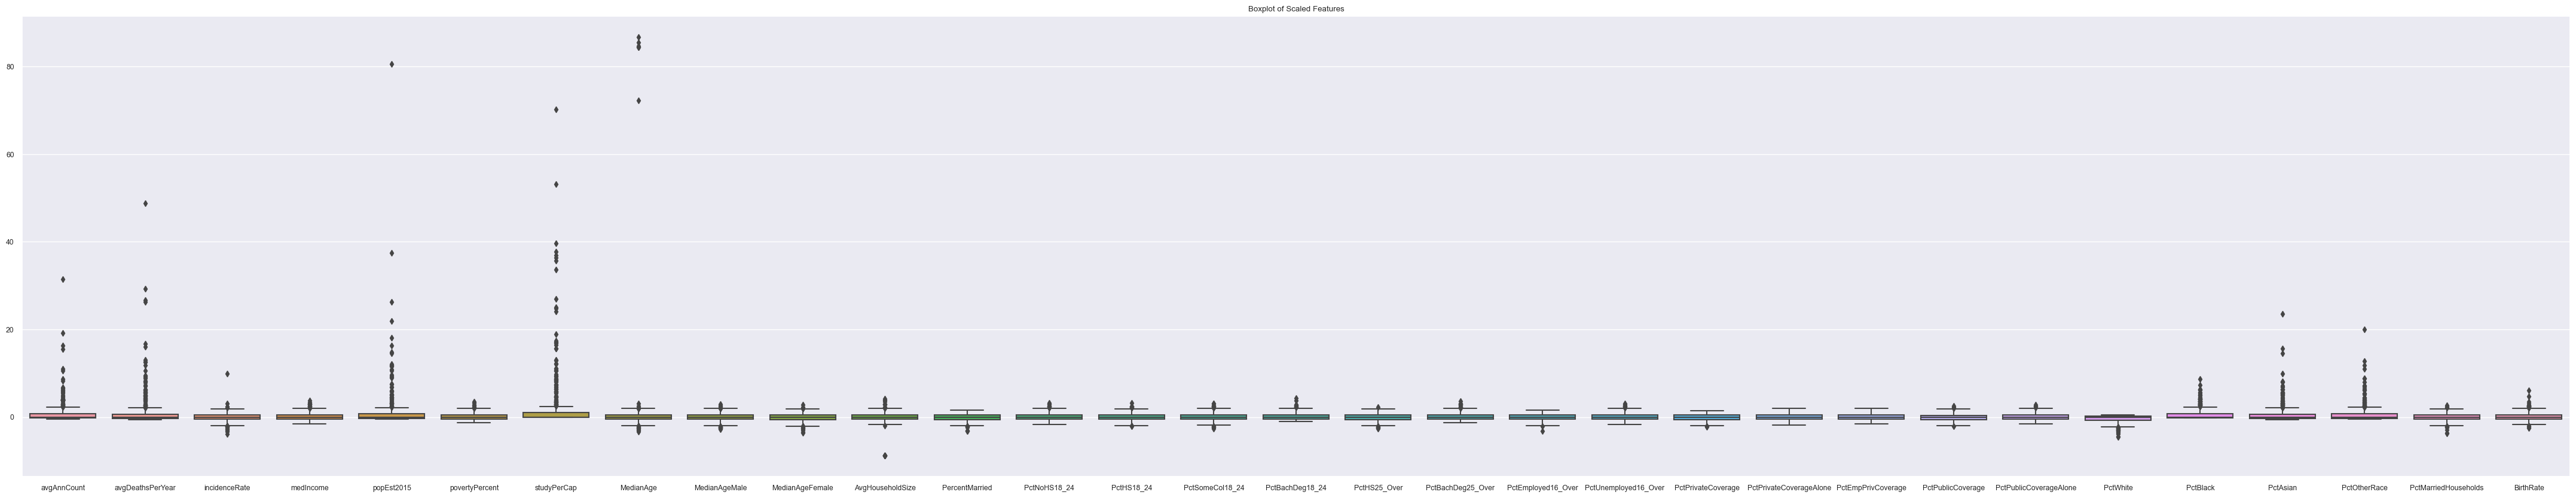

In [25]:
#Create a boxplot to visualize the distribution of scaled features in the training set
plt.figure(figsize=(55, 10))
sns.boxplot(data=X_train_scaled)
plt.title('Boxplot of Scaled Features')
plt.show()


## Ordinary Least Squares
In the following section, I will create 3 Regresion mode for different sets of feature. I will select features based on their correlation with 'TARGET_deathRate' column's data


In [26]:
# Evaluate Linear Regression models with different feature set sizes
feature_set_sizes = [5, 10, 20]
results = []
for f in feature_set_sizes:
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Select the top 'f' features based on correlation with the target variable
    selected_features = X.corrwith(y).abs().nlargest(f).index
    X_train_scaled_subset = X_train_scaled[selected_features]
    X_test_scaled_subset = X_test_scaled[selected_features]
    
    # Fit the model and make predictions
    model.fit(X_train_scaled_subset,y_train)
    y_pred = model.predict(X_test_scaled_subset)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)
    
    # Store results in a dictionary
    results.append({
        'Feature_Set_Size': f,
        'Selected_Features': selected_features.tolist(),
        'Model': model,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })
    
# Print the results for each feature set size
for result in results:
    print(f"\nResults for Feature Set Size {result['Feature_Set_Size']}:")
    print(f"Selected Features: {result['Selected_Features']}")
    print(f"MSE: {result['MSE']}")
    print(f"MAE: {result['MAE']}")
    print(f"R2 Score: {result['R2']}")


Results for Feature Set Size 5:
Selected Features: ['PctBachDeg25_Over', 'PctPublicCoverageAlone', 'PctHS25_Over', 'medIncome', 'incidenceRate']
MSE: 397.67694947507755
MAE: 14.679587591404163
R2 Score: 0.4080401820853491

Results for Feature Set Size 10:
Selected Features: ['PctBachDeg25_Over', 'PctPublicCoverageAlone', 'PctHS25_Over', 'medIncome', 'incidenceRate', 'PctEmployed16_Over', 'povertyPercent', 'PctPublicCoverage', 'PctPrivateCoverage', 'PctPrivateCoverageAlone']
MSE: 401.8256334194998
MAE: 14.418297647255342
R2 Score: 0.4018646816054563

Results for Feature Set Size 20:
Selected Features: ['PctBachDeg25_Over', 'PctPublicCoverageAlone', 'PctHS25_Over', 'medIncome', 'incidenceRate', 'PctEmployed16_Over', 'povertyPercent', 'PctPublicCoverage', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctUnemployed16_Over', 'PctBachDeg18_24', 'PctMarriedHouseholds', 'PctBlack', 'PctHS18_24', 'PercentMarried', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctAsian', 'PctSomeCol18_24']
MSE: 37

In [27]:
# Find the best-performing model based on R2 score
best_model_result = max(results, key=lambda x: x['R2'])

# Retrieve the best model and its selected features
best_model = best_model_result['Model']
best_features = best_model_result['Selected_Features']

# Extract coefficients and intercept from the best model
coefficients = pd.Series(best_model.coef_, index=best_features)
intercept = best_model.intercept_

# Construct and display the linear equation for the best model
equation = f"TARGET_deathRate = {intercept:.3f} + "
equation += " + ".join([f"{coeff:.3f} * {feature}" for feature, coeff in coefficients.items()])
print(f"\nLinear Equation for the Best Model:\n{equation}")


Linear Equation for the Best Model:
TARGET_deathRate = 179.594 + -6.857 * PctBachDeg25_Over + 11.286 * PctPublicCoverageAlone + 3.429 * PctHS25_Over + -0.062 * medIncome + 8.488 * incidenceRate + -9.925 * PctEmployed16_Over + -1.257 * povertyPercent + -15.058 * PctPublicCoverage + -1.099 * PctPrivateCoverage + -12.195 * PctPrivateCoverageAlone + 2.923 * PctUnemployed16_Over + -1.742 * PctBachDeg18_24 + -13.859 * PctMarriedHouseholds + 0.678 * PctBlack + 6.220 * PctHS18_24 + 13.922 * PercentMarried + 13.537 * PctEmpPrivCoverage + -1.932 * PctOtherRace + -0.023 * PctAsian + 4.529 * PctSomeCol18_24


## Gradient Descent Implementation

In the following section, I will implement a gradient descent algorithm and use it to train three separate models with different learning rates.

In [28]:
# Compute the cost of the inear regression model
def computeCost(X,y,theta):
    inner_product = np.power(((X * theta.T) - y),2)
    return np.sum(inner_product) / (2 * len(X))

In [29]:
def gradientDescent (X, y, alpha, iters):
    m, n = X.shape
    
    # Initialize theta with zeros
    theta = np.matrix(np.zeros((1,n)))
    cost = np.zeros(iters)
    
    for i in range (iters):
        # Compute the error
        error = (X * theta.T) - y
        
        # Update each parameter in theta
        for p in range (n):
            gradient =np.multiply(error, X[:,p]) / m 
            theta[0,p] -= alpha * np.sum (gradient)
            
        # Compute and store the cost at each iteration
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [30]:
# Add a column of ones to the input matrix
def add_ones_column(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

In [31]:
# Add a column of ones to the scaled training features and convert it and y_train to a matrix
X_train_scaled_with_bias = add_ones_column(X_train_scaled.values)
y_train_matrix = np.matrix(y_train)
y_train_matrix = y_train_matrix.reshape(-1,1)
X_train_scaled_with_bias = np.matrix(X_train_scaled_with_bias)

In [32]:
y_train_matrix.shape

(472, 1)

In [33]:
X_train_scaled_with_bias

matrix([[ 1.00000000e+00, -1.10011001e-03,  1.35593220e-01, ...,
         -2.78434129e-01, -3.82721727e-01,  1.58606506e-01],
        [ 1.00000000e+00,  1.37403740e+00,  2.27602906e+00, ...,
          1.46144387e-01, -5.40580947e-01, -1.77980304e-01],
        [ 1.00000000e+00,  6.56765677e-01,  1.30750605e+00, ...,
         -2.93922595e-01, -1.87970655e-01, -2.20536722e-01],
        ...,
        [ 1.00000000e+00, -1.15511551e-01,  1.93704600e-02, ...,
         -2.88743854e-01, -1.37315264e-01,  6.88887379e-01],
        [ 1.00000000e+00,  4.80748075e-01,  9.00726392e-01, ...,
         -4.66699692e-02,  3.37440333e-01,  1.57206762e-01],
        [ 1.00000000e+00, -3.64136414e-01, -5.61743341e-01, ...,
          1.17276947e+00, -5.36139695e-01, -8.29070113e-01]])

In [34]:
# Add a column of ones to the scaled testing features and convert y_test to a matrix
X_test_scaled_with_bias = add_ones_column(X_test_scaled.values)
X_test_scaled_with_bias = np.matrix(X_test_scaled_with_bias)
y_test_matrix = np.matrix(y_test)
y_test_matrix = y_test_matrix.reshape(-1,1)

In [35]:
X_test_scaled_with_bias.shape

(119, 32)

In [36]:
# Perform gradient descent for each learning rate in alpha_list
alpha_list = [0.001, 0.01, 0.022465] 
iters = 2000
models = []
cost_records = []

for alpha in alpha_list:
    theta, cost = gradientDescent(X_train_scaled_with_bias, y_train_matrix, alpha, iters)
    models.append(theta)
    cost_records.append(cost)

In [37]:
# Evaluate and print the cost of each model on both training and testing data
for i,m in enumerate(models):
    print("Cost of model {} in train data:".format(i+1))
    print(computeCost(X_train_scaled_with_bias,y_train_matrix,m), "\n")
    print("Cost of model {} in test data:".format(i+1))
    print(computeCost(X_test_scaled_with_bias,y_test_matrix,m), "\n")

Cost of model 1 in train data:
1002.3889150913062 

Cost of model 1 in test data:
829.8952960807856 

Cost of model 2 in train data:
205.79118628698984 

Cost of model 2 in test data:
214.4362700739734 

Cost of model 3 in train data:
200.38070275376347 

Cost of model 3 in test data:
198.8170793202503 



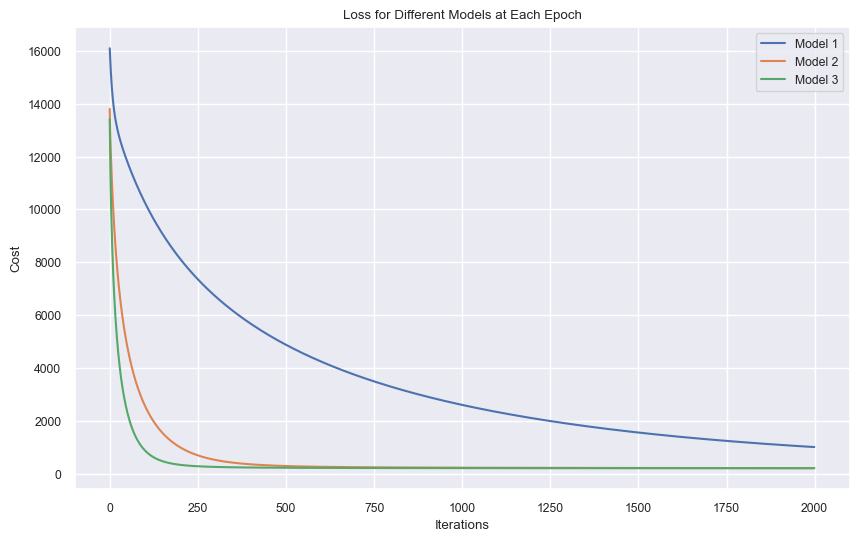

In [38]:
# Plot the cost over iterations for each model
plt.figure(figsize=(10, 6))

for i, cost in enumerate (cost_records):
    plt.plot(np.arange(iters), cost, label=f'Model {i + 1}')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss for Different Models at Each Epoch')
plt.show()
    

## KNN-Regression
Finally, I will utilize a KNN regression model with three different K values to make predictions on the data.

In [39]:
k_values = [10, 21, 30,]

In [40]:
# Train KNN regression models for different values of k and evaluate MSE
knn_models = []
mse_values = []
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    knn_models.append(knn_model)
    mse_values.append(mse)


In [41]:
# Print the MSE values for each K value
for k, mse in zip(k_values, mse_values):
    print(f"K = {k}, MSE: {mse}")

K = 10, MSE: 491.48646554621837
K = 21, MSE: 471.45552773490346
K = 30, MSE: 485.095484126984
